# Cover Type Classification 

In this project, I will use deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. The covertypes are the following:

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is raw and has not been scaled or preprocessed for you. It contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so existing forest cover types are mainly a result of ecological processes rather than forest management practices.

Project Objectives:
Develop one or more classifiers for this multi-class classification problem.
Use TensorFlow with Keras to build your classifier(s).
Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
Test and analyze performance.

In [40]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model



import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os

In [21]:
# read dataset into dataframe

df = pd.read_csv("C:\\Users\\Rene\\Documents\\Datascience\\Codecademy\\projects\\Portfolio Projects\\Forest_Cover_Classification\\data\\cover_data.csv")


# 1. EDA

In [ ]:
df.head(5)

In [ ]:
df.shape

In [ ]:
class_distribution = df['class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
#Checking for categotical features:

# List of soil type features
soil_type_features = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3","Wilderness_Area4", "Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36",
                      "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40"]

# Iterate over soil type features
for feature in soil_type_features:
    unique_values = df[feature].unique()
    print(f"Unique values in {feature}: {unique_values}")

In [ ]:
df.info()

In [ ]:
df.describe()

In [22]:
# Split the data into features (X) and target labels (y)
X = df.drop("class", axis=1)  # Features: Remove the target column
y = df["class"]  # Target labels

In [23]:
# Replace 'features' and 'labels' with your actual feature and label arrays/dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Simple Models
## 2.1 Logistic Regression

In [ ]:
def train_and_evaluate_lr(X_train, y_train, X_test, y_test, max_iter=1000):
    """
    Trains a Logistic Regression model, predicts on the test set,
    and calculates accuracy and precision scores.

    Parameters:
        X_train (numpy.ndarray): Training features.
        y_train (numpy.ndarray): Training labels.
        X_test (numpy.ndarray): Test features.
        y_test (numpy.ndarray): Test labels.
        max_iter (int): Maximum number of iterations for optimization (default: 1000).

    Returns:
        accuracy (float): Accuracy score on the test set.
        precision (float): Weighted precision score on the test set.
    """
    lr_model = LogisticRegression(max_iter=max_iter)
    lr_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)

    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

    return accuracy_lr, precision_lr

# Usage
accuracy_lr, precision_lr = train_and_evaluate_lr(X_train, y_train, X_test, y_test, max_iter=1000)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")

Logistic Regression <br>
max_iter = 10000 <br>
Accuracy: 0.70 <br>
Precision: 0.68 <br>
Max iter reached after 26m35.0s

Logistic Regression <br>
max_iter = 1000 <br>
Accuracy: 0.68 <br>
Precision: 0.65 <br>
Max iter reached after 2m40.0s

## 2.2 Random Forest

In [ ]:
# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training and testing sets
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate accuracy and precision for training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')

# Calculate accuracy and precision for testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')

# Print results
print("Training Set:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")

print("\nTesting Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")

Random Forest Classifier on Testing Set: <br>
Accuracy: 0.96 <br>
Precision: 0.96 <br>
finished after 3m4.3s <br>

# 3. Deep Learning Models

In [25]:
def build_model(num_features):
    """
    Build the model architecture (and compile it).
    input: number of features
    output: Keras model object.
    """
    classifier = keras.Sequential()
    classifier.add(layers.Dense(64, input_dim=num_features, activation='relu'))
    #classifier.add(layers.Dropout(0.3))
    classifier.add(layers.Dense(32, activation='relu'))
    #classifier.add(layers.Dropout(0.3))
    classifier.add(layers.Dense(8, activation='softmax'))
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [26]:
num_features = 54
model = build_model(num_features)

# Print the summary to visualize the model architecture
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                3520      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 8)                 264       
                                                                 


Total params: 5864 (22.91 KB)
Trainable params: 5864 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.7908 - val_loss: 0.4946 - val_accuracy: 0.7914
Epoch 2/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4975 - accuracy: 0.7896 - val_loss: 0.4876 - val_accuracy: 0.7945
Epoch 3/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.7905 - val_loss: 0.4959 - val_accuracy: 0.7877
Epoch 4/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4929 - accuracy: 0.7904 - val_loss: 0.4821 - val_accuracy: 0.7976
Epoch 5/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4928 - accuracy: 0.7903 - val_loss: 0.5103 - val_accuracy: 0.7798
Epoch 6/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4950 - accuracy: 0.7893 - val_loss: 0.4876 - val_accuracy: 0.7945
Epoch 7/100
409/409 [==============================] - 1s 3ms/step - loss: 0.4933 - accuracy: 0.7907 - val_loss: 0.4891 - val_accuracy: 0.7951

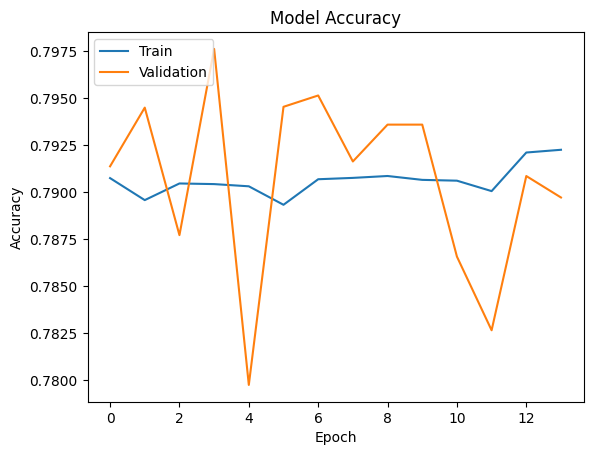

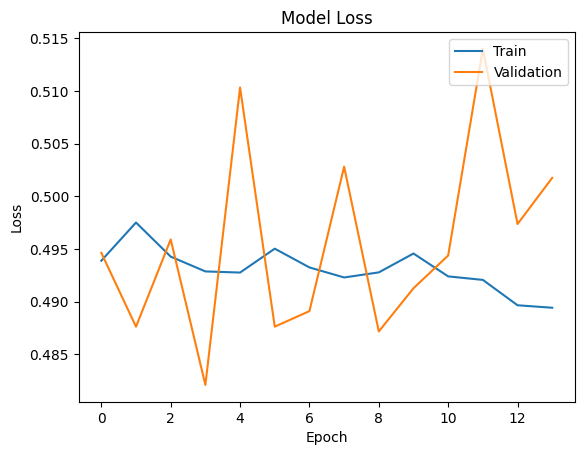

Test loss: 0.509693443775177
Test accuracy: 0.7860296368598938
3632/3632 [==============================] - 5s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.81      0.72      0.76     42557
   Lodgepole Pine       0.79      0.86      0.83     56500
   Ponderosa Pine       0.86      0.70      0.77      7121
Cottonwood/Willow       0.74      0.67      0.71       526
            Aspen       0.78      0.26      0.39      1995
      Douglas-fir       0.56      0.74      0.63      3489
        Krummholz       0.64      0.87      0.74      4015

         accuracy                           0.79    116203
        macro avg       0.74      0.69      0.69    116203
     weighted avg       0.79      0.79      0.78    116203



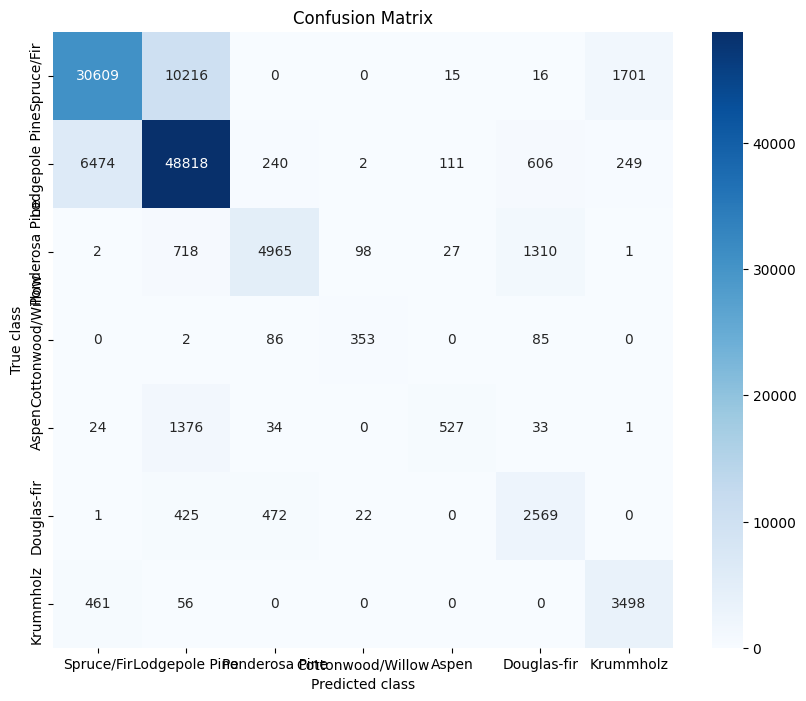

In [42]:

def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        plt.show()

def plot_heatmap(class_names, y_pred, y_test, figsize=(8, 6)):
    """
    Function to compute a Confusion Matrix and plot a heatmap based on the matrix.
    input: class names, y-predicted, y-test (ground-truth)
    output: a PNG file of the heatmap.
    """
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    
    # Create the 'output' directory if it doesn't exist
    if not os.path.exists('output'):
        os.makedirs('output')
    
    # Save the heatmap to file
    heatmapfig = heatmap.get_figure()
    heatmapfig.savefig('output/confusion_matrix.png')

# Define hyperparameters
num_epochs = 100
batch_size = 1024

# Early stopping callback
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    callbacks=[earlystop_callback],
                    validation_split=0.1,
                    verbose=1)

# Plot training history
plot_history(history, 'acc')
plot_history(history, 'loss')

# Evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate classification performance
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Plot confusion matrix
plot_heatmap(class_names, y_pred_classes, y_test, figsize=(10, 8))


The confusion matrix represents the performance of our model's predictions on different classes. Each row of the matrix corresponds to the true classes, while each column corresponds to the predicted classes. Here's how you can interpret the values in the matrix:

Diagonal Elements (Top Left to Bottom Right): These are the true positive values for each class. For example, the value at position (0, 0) represents the number of correct predictions for the "Spruce/Fir" class, which is 27565.

Off-Diagonal Elements: These are misclassification values. For example, the value at position (0, 1) (top row, second column) represents the number of instances that were actually of class "Spruce/Fir" but were predicted as "Lodgepole Pine", which is 14421.

Rows: Each row corresponds to a true class. You can see how well the model is performing on each class based on the distribution of predicted classes within that row.

Columns: Each column corresponds to a predicted class. You can see which true classes were often confused with each predicted class based on the distribution of true classes within that column.

Interpreting the matrix:

The model seems to perform well in correctly predicting the "Spruce/Fir" and "Lodgepole Pine" classes as indicated by the large values on the diagonal in the first two rows.

Some confusion exists between the "Lodgepole Pine" class and the "Ponderosa Pine" class, as well as between the "Lodgepole Pine" and "Aspen" classes.

The model occasionally confuses the "Ponderosa Pine" class with the "Lodgepole Pine" class.

There are instances where the "Cottonwood/Willow" class is incorrectly predicted as the "Spruce/Fir" class, as well as some confusion between "Cottonwood/Willow" and "Lodgepole Pine".

The "Krummholz" class seems to be less well predicted, with several misclassifications across different classes.

To further interpret these results, one might want to consider precision, recall, and F1-score metrics for each class, which can provide more detailed insights into the model's performance for each class.